In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib as mpl
import matplotlib.colors as mcolors

import pandas as pd

import seaborn as sns
from sklearn.metrics import confusion_matrix

import cmocean as cmo

import tensorflow as tf

# Question Number 1

In [138]:
# Download dataset
sst_data_full = xr.open_dataset('/Users/ahill/Downloads/sst.mnmean.nc')

# Data from xarray dataset
sst_var = sst_data_full.sst



# Question Number 2

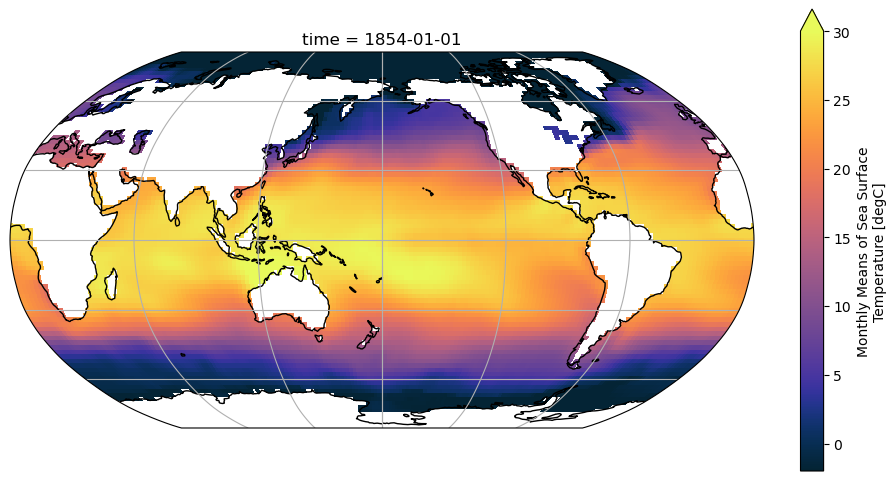

In [139]:
# Plot the first time step of the SST data
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))
ax.coastlines()
ax.gridlines()

# Select first time with .isel()
sst_var.isel(time=0).plot(
    ax=ax, transform=ccrs.PlateCarree(), vmin=-2, vmax=30, cmap=cmo.cm.thermal
)

In [140]:
# Info about the dataset
sst_data_full

<xarray.Dataset> Size: 131MB
Dimensions:    (lat: 89, lon: 180, time: 2048, nbnds: 2)
Coordinates:
  * lat        (lat) float32 356B 88.0 86.0 84.0 82.0 ... -84.0 -86.0 -88.0
  * lon        (lon) float32 720B 0.0 2.0 4.0 6.0 ... 352.0 354.0 356.0 358.0
  * time       (time) datetime64[ns] 16kB 1854-01-01 1854-02-01 ... 2024-08-01
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) float64 33kB ...
    sst        (time, lat, lon) float32 131MB ...
Attributes: (12/37)
    climatology:               Climatology is based on 1971-2000 SST, Xue, Y....
    description:               In situ data: ICOADS2.5 before 2007 and NCEP i...
    keywords_vocabulary:       NASA Global Change Master Directory (GCMD) Sci...
    keywords:                  Earth Science > Oceans > Ocean Temperature > S...
    instrument:                Conventional thermometers
    source_comment:            SSTs were observed by conventional thermometer...
    ...                        ...
    creator_url_original:      https://www.ncei.noaa.gov
    license:                   No constraints on data access or use
    comment:                   SSTs were observed by conventional thermometer...
    summary:                   ERSST.v5 is developed based on v4 after revisi...
    dataset_title:             NOAA Extended Reconstructed SST V5
    data_modified:             2024-09-04

# Questions 3a, 3b

In [141]:
# Use a baseline period of your choosing and select out that period from the full dataset
sst_climo_period = sst_var.sel(time=slice('1930-01-01', '1959-12-31'))

# Compute the monthly climo
mean_climatology = sst_climo_period.groupby('time.month').mean(dim='time')

# Compute anomalies by removing the monthly climo
sst_anom = sst_var.groupby('time.month') - mean_climatology

# Select only the region associated with Nino3.4
nino34_anom = sst_anom.sel(lat=slice(5, -5), lon=slice(190, 240)) # use lat/lon coordinates of data


In [142]:
nino34_anom

<xarray.DataArray 'sst' (time: 2048, lat: 5, lon: 26)> Size: 1MB
array([[[-0.38539124, -0.5319309 , -0.6215229 , ...,  0.3476143 ,
          0.30967712,  0.2571392 ],
        [-0.61237144, -0.82647705, -0.9404297 , ...,  0.49538803,
          0.4788742 ,  0.45513535],
        [-0.65312386, -0.92873955, -1.0412941 , ...,  0.4803543 ,
          0.48495293,  0.48586845],
        [-0.47263908, -0.6927395 , -0.86371994, ...,  0.29555702,
          0.3103752 ,  0.31155014],
        [-0.15792274, -0.35704613, -0.55202866, ...,  0.0648613 ,
          0.07089615,  0.07081413]],

       [[-0.25871277, -0.46834755, -0.60967827, ...,  0.24793053,
          0.16155434,  0.05775642],
        [-0.51607895, -0.80589867, -0.9735184 , ...,  0.4798851 ,
          0.4185257 ,  0.32652092],
        [-0.6174259 , -0.9671345 , -1.125967  , ...,  0.559845  ,
          0.52162933,  0.452631  ],
        [-0.4997921 , -0.78155327, -0.9875965 , ...,  0.4002533 ,
          0.374094  ,  0.31899834],
        [-0.22953796, -0.4777336 , -0.7031536 , ...,  0.14598083,
...
          0.75056267,  0.7243576 ],
        [ 1.072361  ,  0.9894333 ,  0.9122181 , ...,  0.69055176,
          0.67894936,  0.67697525],
        [ 1.0523624 ,  0.94716454,  0.86100197, ...,  0.5486603 ,
          0.54117393,  0.5601387 ],
        [ 1.0204773 ,  0.92455864,  0.8415661 , ...,  0.46136665,
          0.45773888,  0.47165108],
        [ 0.9777336 ,  0.9097328 ,  0.8447056 , ...,  0.49801064,
          0.49324608,  0.5054264 ]],

       [[ 1.1595192 ,  1.1062641 ,  1.0374565 , ...,  0.3893242 ,
          0.38832474,  0.37569237],
        [ 1.1941433 ,  1.1319237 ,  1.0435715 , ...,  0.28338242,
          0.28162193,  0.28118706],
        [ 1.2183895 ,  1.1440735 ,  1.0581093 , ...,  0.16767502,
          0.1587658 ,  0.16924477],
        [ 1.1859436 ,  1.1164017 ,  1.0361824 , ...,  0.17606735,
          0.16572762,  0.16957664],
        [ 1.0991688 ,  1.0426388 ,  0.97530746, ...,  0.34684753,
          0.33741188,  0.34338188]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 20B 4.0 2.0 0.0 -2.0 -4.0
  * lon      (lon) float32 104B 190.0 192.0 194.0 196.0 ... 236.0 238.0 240.0
  * time     (time) datetime64[ns] 16kB 1854-01-01 1854-02-01 ... 2024-08-01
    month    (time) int64 16kB 1 2 3 4 5 6 7 8 9 10 11 ... 11 12 1 2 3 4 5 6 7 8

# Question 3c

In [143]:
# Compute the weights for the cosine of latitude. 
# We do this because grid boxes vary in size with increasing latitude!
weights = np.cos(np.deg2rad(nino34_anom['lat']))

index_nino34 = nino34_anom.weighted(weights).mean(("lon", "lat"))

In [144]:
index_nino34

<xarray.DataArray 'sst' (time: 2048)> Size: 8kB
array([-0.2502993 , -0.3045453 ,  0.00438667, ...,  0.7282527 ,
        0.6890221 ,  0.5803587 ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 16kB 1854-01-01 1854-02-01 ... 2024-08-01
    month    (time) int64 16kB 1 2 3 4 5 6 7 8 9 10 11 ... 11 12 1 2 3 4 5 6 7 8

# Question 3d

In [146]:
# Use all times in the record
time_var = np.arange(len(index_nino34.time))

# Trend computed as a linear regression
coeffs = np.polyfit(time_var, index_nino34, deg=1)  # Linear fit (degree=1)

slope = coeffs[0]  # Slope of the regression
intercept = coeffs[1]  # Intercept of the regression

# Y = mx + b
trend = slope * time_var + intercept 

# Subtract the trend from nino34 index
detrended_index_nino34 = index_nino34 - trend

# Reassigned to new variable that has shorter name; personal preference
nino34 = detrended_index_nino34

In [147]:
nino34

<xarray.DataArray 'sst' (time: 2048)> Size: 16kB
array([ 0.04633147, -0.0083239 ,  0.30019873, ...,  0.18774441,
        0.14810447,  0.03903167])
Coordinates:
  * time     (time) datetime64[ns] 16kB 1854-01-01 1854-02-01 ... 2024-08-01
    month    (time) int64 16kB 1 2 3 4 5 6 7 8 9 10 11 ... 11 12 1 2 3 4 5 6 7 8

# Question 3e

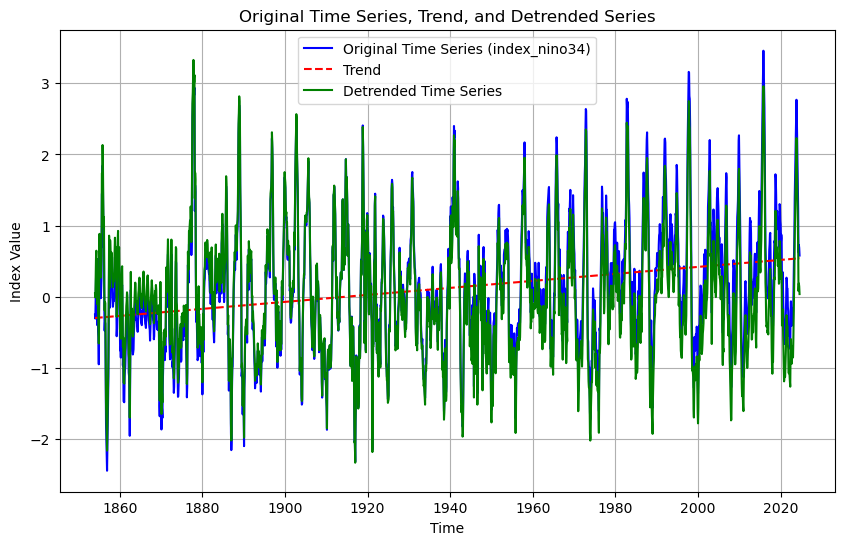

In [148]:
# Plot original data, trend, and detrended data
plt.figure(figsize=(10, 6))

plt.plot(index_nino34.time, index_nino34, label='Original Time Series (index_nino34)', color='blue')
plt.plot(index_nino34.time, trend, label='Trend', color='red', linestyle='--')
plt.plot(index_nino34.time, detrended_nino34, label='Detrended Time Series', color='green')

plt.title('Original Time Series, Trend, and Detrended Series')
plt.xlabel('Time')
plt.ylabel('Index Value')
plt.legend()
plt.grid(True)
plt.show()

# Question 4

Text(0.5, 1.0, 'Niño 3.4 Index')

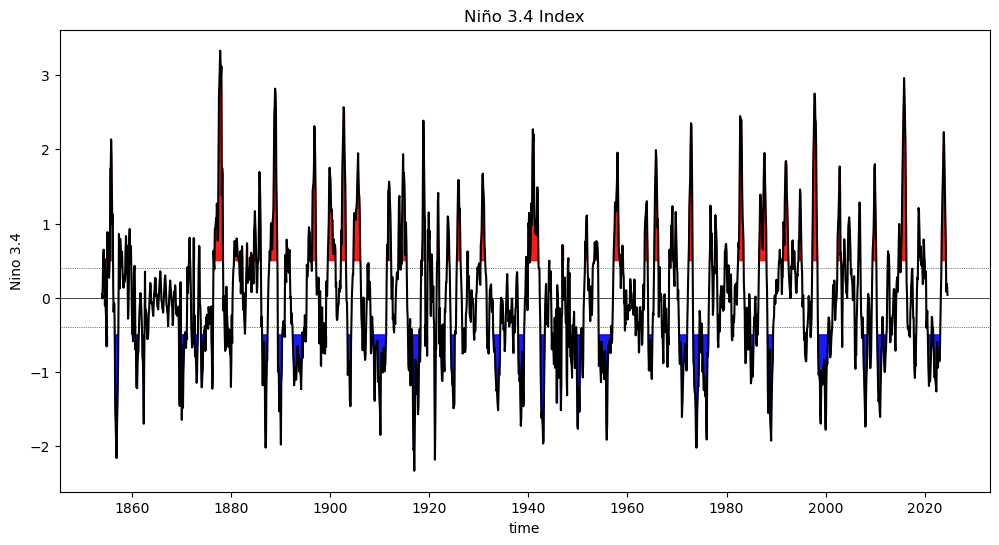

In [149]:
fig = plt.figure(figsize=(12, 6))

plt.fill_between(nino34.time.data, nino34.where(nino34 >= 0.5).data, 0.5, color='red', alpha=0.9)
plt.fill_between(nino34.time.data, nino34.where(nino34 <= -0.5).data, -0.5, color='blue', alpha=0.9)

nino34.plot(color='black')
plt.ylabel('Nino 3.4')
plt.axhline(0, color='black', lw=0.5)
plt.axhline(0.4, color='black', linewidth=0.5, linestyle='dotted')
plt.axhline(-0.4, color='black', linewidth=0.5, linestyle='dotted')
plt.title('Niño 3.4 Index')

# Question 5

In [155]:
nino34 = nino34.dropna(dim='time') # drop missing labels along time dimension

# Create a new variable that classifies the Nino3.4 index into 3 categories
# 0 = La Nina, 1 = Neutral, 2 = El Nino
nino34_class = xr.DataArray(np.where(nino34 >= 0.5, 2, np.where(nino34 <= -0.5, 0, 1)), coords=[nino34.time], dims=["time"])

print(nino34_class)
print('Number of El Nino Events: ',nino34_class.where(nino34_class == 2).count().values)
print('Number of Neutral Events: ',nino34_class.where(nino34_class == 1).count().values)
print('Number of La Nina Events: ',nino34_class.where(nino34_class == 0).count().values)

<xarray.DataArray (time: 2048)> Size: 16kB
array([1, 1, 1, ..., 1, 1, 1])
Coordinates:
  * time     (time) datetime64[ns] 16kB 1854-01-01 1854-02-01 ... 2024-08-01
Number of El Nino Events:  518
Number of Neutral Events:  931
Number of La Nina Events:  599


# Question 6

In [156]:
# Get the years from the time coordinate
years = np.array(sorted(np.unique(nino34.time.dt.year.values)))

# Proportions for training, validation, and testing splits
train_prop = 0.7
val_prop = 0.15
test_prop = 0.15

# Calculate the number of years for each split
train_size = int(train_prop * len(years))   
val_size = int(val_prop * len(years))    
test_size = len(years) - train_size - val_size  

# Could alternatively use the train_test_split from scikit_learn for more robustness
# E.g.,
# X_train, x_holder, Y_train, y_holder = train_test_split(nino34, nino34_class, test_size=(test_prop+val_prop), shuffle=False)
# X_val, x_test, y_val, y_test = train_test_split(x_holder, y_holder, test_size = 0.5, shuffle=False)

# Split the years sequentially rather than a random draw
train_years = years[:train_size]
val_years = years[train_size:train_size + val_size]
test_years = years[train_size + val_size:]

# Create boolean masks to select data by year using xarray DataArrays
train_mask = xr.DataArray(np.isin(nino34.time.dt.year, train_years), dims="time", coords={"time": nino34.time})
val_mask = xr.DataArray(np.isin(nino34.time.dt.year, val_years), dims="time", coords={"time": nino34.time})
test_mask = xr.DataArray(np.isin(nino34.time.dt.year, test_years), dims="time", coords={"time": nino34.time})

nino34_anom = nino34_anom.stack(z=('lat','lon'))

# Apply masks to get training, validation, and testing sets
sst_train = nino34_anom.where(train_mask, drop=True)
sst_val = nino34_anom.where(val_mask, drop=True)
sst_test = nino34_anom.where(test_mask, drop=True)

nino_train = nino34_class.where(train_mask, drop=True)
nino_val = nino34_class.where(val_mask, drop=True)
nino_test = nino34_class.where(test_mask, drop=True)

In [157]:
sst_train

<xarray.DataArray 'sst' (time: 1428, z: 130)> Size: 743kB
array([[-0.38539124, -0.5319309 , -0.6215229 , ...,  0.0648613 ,
         0.07089615,  0.07081413],
       [-0.25871277, -0.46834755, -0.60967827, ...,  0.14598083,
         0.11732674,  0.08030128],
       [ 0.31193733,  0.23943901,  0.18927765, ...,  0.00990677,
        -0.02412605, -0.07762146],
       ...,
       [ 1.3190842 ,  1.4193897 ,  1.5106621 , ...,  2.2813396 ,
         2.2993069 ,  2.3100052 ],
       [ 1.3501701 ,  1.4982986 ,  1.6303959 , ...,  2.573063  ,
         2.5642376 ,  2.5401707 ],
       [ 1.3322926 ,  1.5235939 ,  1.6922722 , ...,  2.4711971 ,
         2.4672565 ,  2.4707203 ]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 11kB 1854-01-01 1854-02-01 ... 1972-12-01
    month    (time) int64 11kB 1 2 3 4 5 6 7 8 9 10 ... 3 4 5 6 7 8 9 10 11 12
  * z        (z) object 1kB MultiIndex
  * lat      (z) float32 520B 4.0 4.0 4.0 4.0 4.0 ... -4.0 -4.0 -4.0 -4.0 -4.0
  * lon      (z) float32 520B 190.0 192.0 194.0 196.0 ... 236.0 238.0 240.0

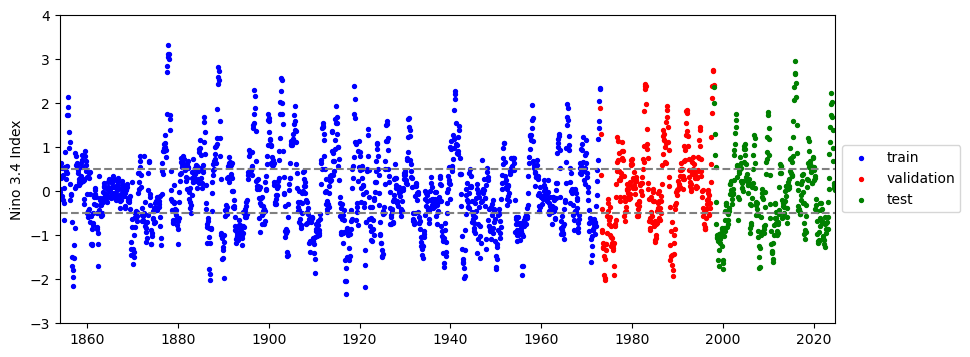

In [158]:
# Ensure that the time coordinate is properly accessed and handled
time_data = nino34.time.values

# Create masks for each condition
el_nino_mask = nino34 >= 0.5
la_nina_mask = nino34 <= -0.5
neutral_mask = (nino34 > -0.5) & (nino34 < 0.5)

# Plot scatter plot for training data (El Niño, La Niña, and Neutral combined)
plt.figure(figsize=(10, 4))
plt.scatter(time_data[train_mask.values & (el_nino_mask | la_nina_mask | neutral_mask).values],
            nino34[train_mask & (el_nino_mask | la_nina_mask | neutral_mask)],
            color='blue', s=8, label="train")

# Plot scatter plot for validation data
plt.scatter(time_data[val_mask.values & (el_nino_mask | la_nina_mask | neutral_mask).values],
            nino34[val_mask & (el_nino_mask | la_nina_mask | neutral_mask)],
            color='red', s=8, label="validation")

# Plot scatter plot for test data
plt.scatter(time_data[test_mask.values & (el_nino_mask | la_nina_mask | neutral_mask).values],
            nino34[test_mask & (el_nino_mask | la_nina_mask | neutral_mask)],
            color='green', s=8, label="test")

# Add horizontal lines for El Niño and La Niña thresholds
plt.hlines(0.5, nino_train.time[0], nino_test.time[-1],linestyle='dashed', color='grey')
plt.hlines(-0.5, nino_train.time[0], nino_test.time[-1], linestyle='dashed', color='grey')

# Set plot limits and labels
plt.xlim(nino_train.time[0], nino_test.time[-1])
plt.ylim(-3, 4)
plt.ylabel("Nino 3.4 Index")

# Add legend
plt.legend(bbox_to_anchor=(1, 0.4, .1, 0.2))

# Show the plot
plt.show()

# Question 7

In [159]:
# Set random seed
random_seed = 42
tf.random.set_seed(random_seed)

# Normalize SST data using the training standard deviation (sst_std)
sst_std = np.std(sst_train, axis=0)
sst_train = sst_train / sst_std
sst_train = np.where(sst_train.isnull(), 0, sst_train)  # Set NaNs to zero in the training data if they exist

sst_val = sst_val / sst_std
sst_val = np.where(sst_val.isnull(), 0, sst_val)  # Set NaNs to zero in the validation data

sst_test = sst_test / sst_std
sst_test = np.where(sst_test.isnull(), 0, sst_test)  # Set NaNs to zero in the test data

sst_train_np = sst_train   # Extract NumPy array from xarray DataArray
nino_train_np = tf.keras.utils.to_categorical(nino_train.values, 3)  # make labels three 'categories' in a numpy array

sst_val_np = sst_val 
nino_val_np = tf.keras.utils.to_categorical(nino_val.values, 3)

sst_test_np = sst_test 
nino_test_np = tf.keras.utils.to_categorical(nino_test.values, 3)



In [160]:
sst_train_np

array([[-0.5533095 , -0.71722466, -0.7995963 , ...,  0.07429923,
         0.0806383 ,  0.08024244],
       [-0.37143615, -0.6314925 , -0.784358  , ...,  0.16722244,
         0.13344912,  0.09099273],
       [ 0.44785112,  0.3228456 ,  0.24350785, ...,  0.0113483 ,
        -0.02744132, -0.0879561 ],
       ...,
       [ 1.8938205 ,  1.9138223 ,  1.943484  , ...,  2.6132963 ,
         2.6152647 ,  2.617563  ],
       [ 1.9384509 ,  2.0202186 ,  2.097523  , ...,  2.947468  ,
         2.9166007 ,  2.878373  ],
       [ 1.912784  ,  2.054325  ,  2.1771274 , ...,  2.8307798 ,
         2.806293  ,  2.799676  ]], dtype=float32)

# Question 8

In [161]:
hiddens = [6, 6]  # Hidden layers: Two layers with 6 nodes each
lr = 1e-3  # Learning rate for the optimizer
opt = tf.keras.optimizers.Adam(learning_rate=lr)
n_epochs = 20  # Number of epochs to train the model
batch_size = 32  # Batch size for training
output_nodes = 3  # Number of output nodes (three-class for ENSO)
loss_func = tf.keras.losses.CategoricalCrossentropy()
input_size = sst_train_np.shape[1]

In [162]:
sst_train_np.shape

(1428, 130)

# Question 9

In [163]:
# Make training and validation tensorflow datasets
ds_train = tf.data.Dataset.from_tensor_slices((sst_train_np,nino_train_np))
ds_val = tf.data.Dataset.from_tensor_slices((sst_val_np, nino_val_np))

# Shuffle training data
ds_train = ds_train.shuffle(ds_train.cardinality().numpy())

# Batch training and validation
ds_train = ds_train.batch(batch_size)
ds_val = ds_val.batch(batch_size)


# Question 10

In [164]:
# Input Layer
input_layer = tf.keras.layers.InputLayer(shape=(sst_train_np.shape[1],))

# Two dense layers
# Future edit: make the number of dense layers through the previously set variable hiddens
dense_layer = tf.keras.layers.Dense(hiddens[0], activation='relu')
dense_layer2 = tf.keras.layers.Dense(hiddens[1], activation='relu')

# Output layer
output_layer = tf.keras.layers.Dense(output_nodes, activation='softmax')

model = tf.keras.models.Sequential([input_layer, dense_layer, dense_layer2, output_layer])

In [165]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 6)              │           786 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 849 (3.32 KB)

 Trainable params: 849 (3.32 KB)

 Non-trainable params: 0 (0.00 B)

In [166]:
model.compile(loss=loss_func, optimizer=opt, metrics=["accuracy"])

In [167]:
history = model.fit(ds_train, validation_data=ds_val, epochs=n_epochs)

Epoch 1/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5084 - loss: 0.9720 - val_accuracy: 0.6933 - val_loss: 0.8829
Epoch 2/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - accuracy: 0.5691 - loss: 0.8599 - val_accuracy: 0.6933 - val_loss: 0.8537
Epoch 3/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step - accuracy: 0.5931 - loss: 0.7897 - val_accuracy: 0.6967 - val_loss: 0.8333
Epoch 4/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - accuracy: 0.5988 - loss: 0.7601 - val_accuracy: 0.7000 - val_loss: 0.8050
Epoch 5/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - accuracy: 0.6022 - loss: 0.7386 - val_accuracy: 0.6900 - val_loss: 0.7850
Epoch 6/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - accuracy: 0.6323 - loss: 0.6927 - val_accuracy: 0.6667 - val_loss: 0.7534
Epoch 7/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - accuracy: 0.6516 - loss: 0.6282 - val_accuracy: 0.6600 - val_loss: 0.7210
Epoch 8/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step - accuracy: 0.6734 - loss: 0.5714 - val_accuracy: 0.63

Text(0, 0.5, 'loss')

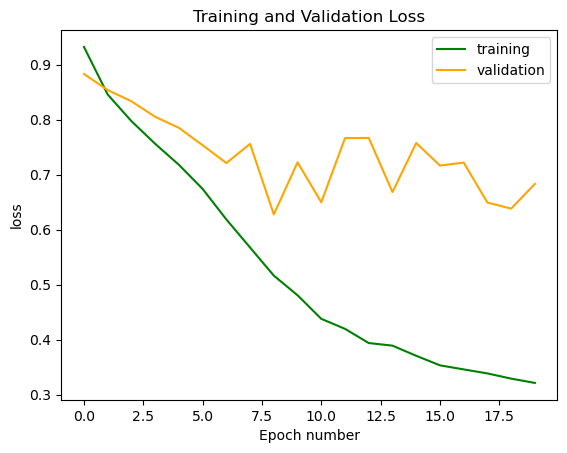

In [170]:
plt.title('Training and Validation Loss')
plt.plot(history.history['loss'], color='green', label='training')
plt.plot(history.history['val_loss'], color='orange', label='validation')
plt.legend()
plt.xlabel('Epoch number')
plt.ylabel('loss')

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step


(array([[115., 145.,   5.,   5.,   6.,   0.,   5.,   5.,   7.,  27.],
        [ 26.,   8., 113.,  29.,   9.,  18.,   9.,  15.,  22.,  71.],
        [144.,  14.,   8.,  10.,  14., 130.,   0.,   0.,   0.,   0.]]),
 array([5.35811499e-11, 9.99407321e-02, 1.99881464e-01, 2.99822211e-01,
        3.99762928e-01, 4.99703676e-01, 5.99644423e-01, 6.99585140e-01,
        7.99525857e-01, 8.99466634e-01, 9.99407351e-01]),
 <a list of 3 BarContainer objects>)

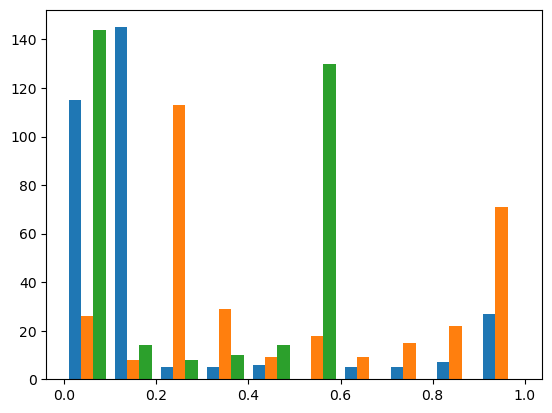

In [171]:
# Visualize the predictions
y_preds = model.predict(sst_test_np)

plt.figure()
plt.hist(y_preds)

In [172]:
score = model.evaluate(sst_test_np, nino_test_np, verbose = 0) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 1.0635197162628174
Test accuracy: 0.6187499761581421


# Extra Credit Question 1

In [179]:
# Find the index of the test set labels and predicted labels
test_pos = np.argmax(nino_test_np, axis=-1)
pred_pos =  tf.argmax(model.predict(sst_test_np), axis=-1)
test_cm = confusion_matrix(test_pos, pred_pos)

val_pos = np.argmax(nino_val_np, axis=-1)
val_pred_pos =  tf.argmax(model.predict(sst_val_np), axis=-1)
val_cm = confusion_matrix(val_pos, val_pred_pos)

train_pos = np.argmax(nino_train_np, axis=-1)
train_pred_pos = tf.argmax(model.predict(sst_train_np), axis=-1)
train_cm = confusion_matrix(train_pos, train_pred_pos)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step


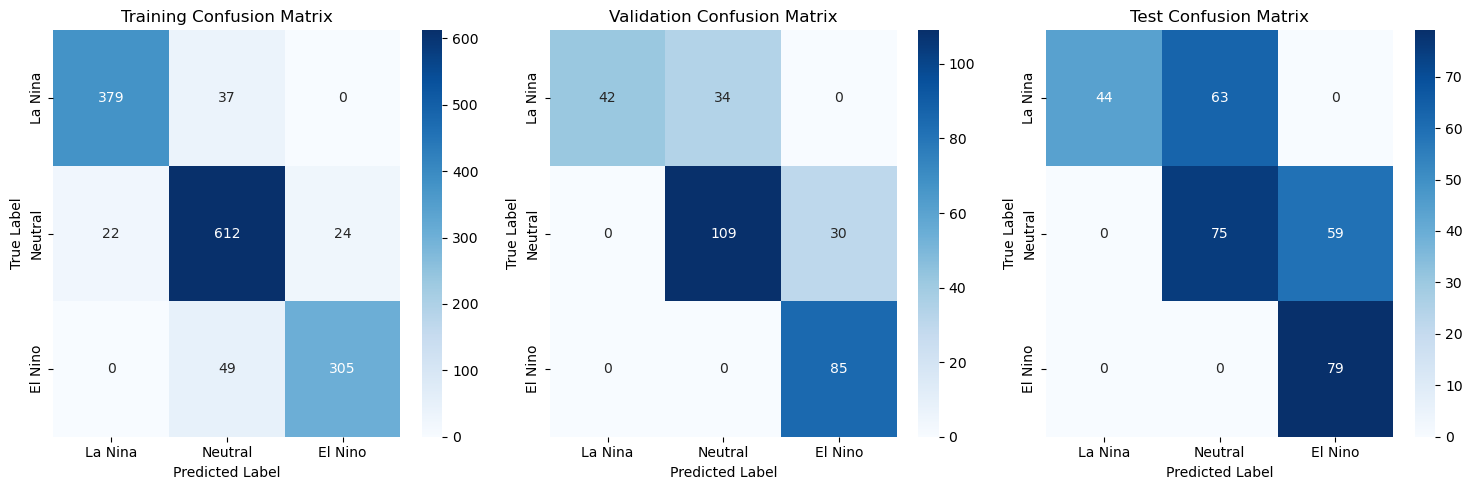

In [180]:
# Plot confusion matrices side by side
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Define class labels
class_names = ['La Nina', 'Neutral', 'El Nino']

# Plot for training confusion matrix
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names, ax=axs[0])
axs[0].set_title('Training Confusion Matrix')
axs[0].set_xlabel('Predicted Label')
axs[0].set_ylabel('True Label')

# Plot for validation confusion matrix
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names, ax=axs[1])
axs[1].set_title('Validation Confusion Matrix')
axs[1].set_xlabel('Predicted Label')
axs[1].set_ylabel('True Label')

# Plot for test confusion matrix
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names, ax=axs[2])
axs[2].set_title('Test Confusion Matrix')
axs[2].set_xlabel('Predicted Label')
axs[2].set_ylabel('True Label')

# Display the plot
plt.tight_layout()
plt.show()

# Extra credit question 2

In [181]:
# Grab the class predictions from the test set using argmax; tells you which index the "1" class lies in
test_label = np.argmax(nino_test_np, axis=-1)
pred_label = tf.argmax(model.predict(sst_test_np), axis=-1)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step


In [182]:
# Correct predictions line up where the test label is equal to the predicted label
correct_predictions = np.argwhere(test_label == pred_label)

In [74]:
# Get indices for correct predictions of each class
correct_class_0_indices = correct_predictions[np.argmax(nino_test_np[correct_predictions], axis=-1) == 0]
correct_class_1_indices = correct_predictions[np.argmax(nino_test_np[correct_predictions], axis=-1) == 1]
correct_class_2_indices = correct_predictions[np.argmax(nino_test_np[correct_predictions], axis=-1) == 2]

In [183]:
# Create a custom diverging colormap with white in the middle
cmap = mcolors.TwoSlopeNorm(vmin=-1.5, vcenter=0, vmax=1.5)  
custom_cmap = 'RdBu_r'

# Function to generate composites for a specific class
def composite_plot(class_indices, class_label, tos_nino34, nino_test):
    # Get the timestamps corresponding to the correct predictions for the specified class
    correct_times = nino_test.time[class_indices]  # Adjust according to your time variable

    # Create a mask to select SST data based on correct prediction timestamps
    mask = tos_nino34.time.isin(correct_times)

    # Composite the SST data for the correct predictions of the specified class
    composite_sst = tos_nino34.where(mask, drop=True).mean(dim='time')

    # Plotting the composite SST for the correct predictions of the specified class
    plt.figure(figsize=(10, 5))
    mappable = composite_sst.plot(cmap=custom_cmap, norm=cmap, robust=True, add_colorbar=False)  # Use the custom colormap
    
    # Adding colorbar and setting the label
    cbar = plt.colorbar(mappable)
    cbar.set_label('SST Anomaly (°C)', rotation=90, labelpad=15)  # Rotate the label and set padding

    plt.title(f"Composite SSTAs for Correct Predictions of Class {class_label}")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()




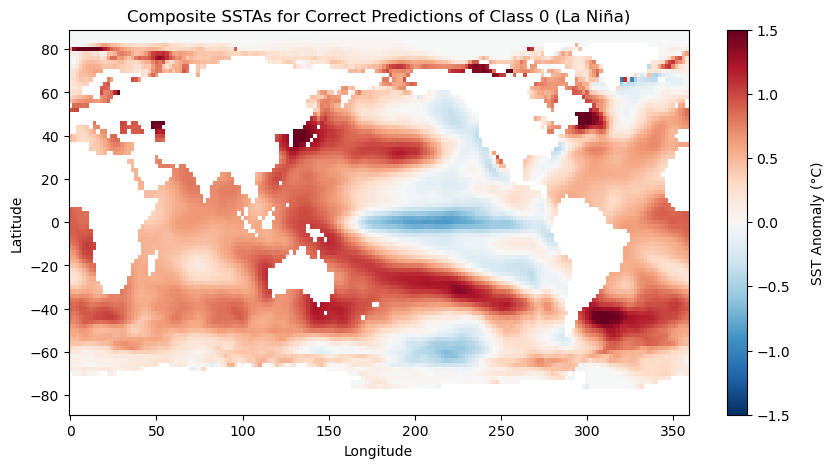

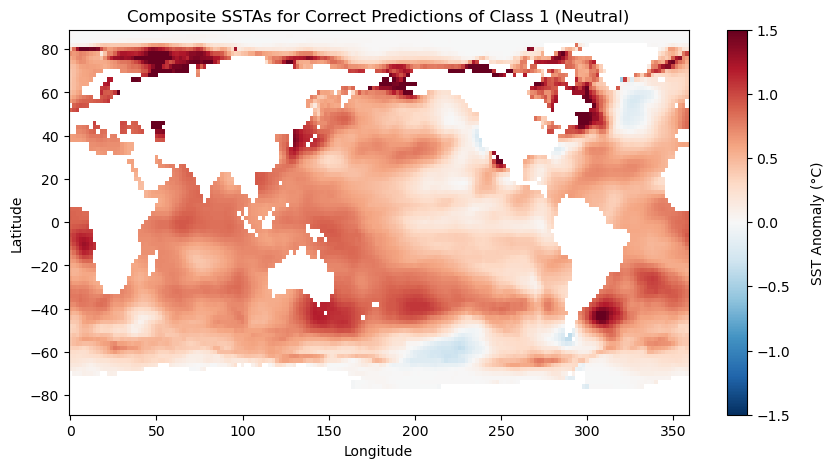

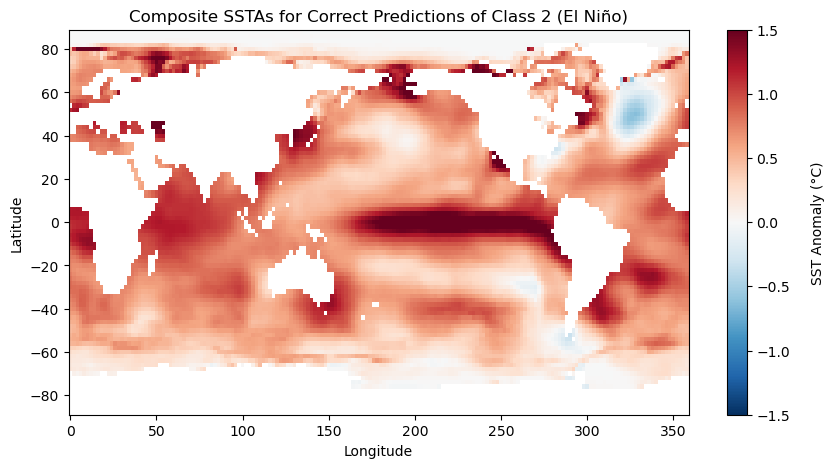

In [184]:
# Generate composites for all three classes
composite_plot(correct_class_0_indices, "0 (La Niña)", tos_nino34, nino_test)
composite_plot(correct_class_1_indices, "1 (Neutral)", tos_nino34, nino_test)
composite_plot(correct_class_2_indices, "2 (El Niño)", tos_nino34, nino_test)